## Importing necessary libraries

In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

## Reading the graph

In [2]:
# A function to read graph from a pickle file
def read_graph(path):
    graph = None
    with open(path, 'rb') as file:
        graph = pickle.load(file)
    return graph

In [3]:
graph = read_graph('graph.pickle')

# Undirected Graph

## Degree Analysis

In [7]:
undirected_graph = nx.Graph()
for sender, receiver, _ in graph.edges.data():
    undirected_graph.add_edge(sender, receiver)
print(f'Number of Nodes: {undirected_graph.number_of_nodes()}')
print(f'Number of Edges: {undirected_graph.number_of_edges()}')

degrees = np.array([val for (node, val) in undirected_graph.degree])
print(f'Max Degree: {np.max(degrees)}')

print(f'Nodes with degree 1: {(degrees == 1).sum()}')
print(f'Nodes with degree 2: {(degrees == 2).sum()}')
print(f'Nodes with degree 3: {(degrees == 3).sum()}')
print(f'Nodes with degree 4: {(degrees == 4).sum()}')
print(f'Nodes with degree 5: {(degrees == 5).sum()}')
print(f'Nodes with degree 6-10: {np.logical_and(degrees >= 6, degrees <= 10).sum()}')
print(f'Nodes with degree 11-20: {np.logical_and(degrees >= 11, degrees <= 20).sum()}')
print(f'Nodes with degree 21-30: {np.logical_and(degrees >= 21, degrees <= 30).sum()}')
print(f'Nodes with degree 31-50: {np.logical_and(degrees >= 31, degrees <= 50).sum()}')
print(f'Nodes with degree 51-100: {np.logical_and(degrees >= 51, degrees <= 100).sum()}')
print(f'Nodes with degree 100-500: {np.logical_and(degrees >= 101, degrees <= 500).sum()}')
print(f'Nodes with degree 501-2517: {np.logical_and(degrees >= 501, degrees <= 2558).sum()}')

Number of Nodes: 116713
Number of Edges: 119762
Max Degree: 2517
Nodes with degree 1: 88571
Nodes with degree 2: 16655
Nodes with degree 3: 7547
Nodes with degree 4: 1141
Nodes with degree 5: 584
Nodes with degree 6-10: 962
Nodes with degree 11-20: 380
Nodes with degree 21-30: 154
Nodes with degree 31-50: 220
Nodes with degree 51-100: 282
Nodes with degree 100-500: 212
Nodes with degree 501-2517: 5


## Connected Component Analysis

In [9]:
connected_components = [Gc for Gc in sorted(nx.connected_components(undirected_graph), key=len, reverse=True)]
connected_components_length = np.array([len(x) for x in connected_components])
print(f"Number of connected components: {len(connected_components)}")
print("Distribution of size of connected_components")
unique, frequency = np.unique(connected_components_length, return_counts=True)
print('Different sizes of connected groups')
print(unique)
print("Frequency corresponding to each group")
print(frequency)

Number of connected components: 10313
Distribution of size of connected_components
Different sizes of connected groups
[    2     3     4     5     6     7     8     9    10    11    12    13
    14    15    16    17    18    19    20    21    22    23    24    25
    26    27    28    29    30    31    33    34    36    38    39    40
    41    48    49    52    58    63    72    73    75   177   403   456
 81756]
Frequency corresponding to each group
[3569 4992  504  609  151  163   49   61   22   40   26   13   12   16
   15    8    3    9    3    6    1    2    3    2    2    2    1    2
    1    2    2    1    2    1    2    2    1    1    2    1    1    1
    1    1    1    1    1    1    1]


# Directed Graph

## Degree Analysis

### Total Degree Analysis

In [4]:
print('Analyzing the graph as a MultiDiGraph (A directed graph which can have multiple edges between two nodes)')
print(f'Number of nodes: {graph.number_of_nodes()}')
print(f'Number of Edges: {graph.number_of_edges()}')
degrees = np.array([val for (node, val) in graph.degree])
print(f'Nodes with degree 1: {(degrees == 1).sum()}')
print(f'Nodes with degree 2: {(degrees == 2).sum()}')
print(f'Nodes with degree 3: {(degrees == 3).sum()}')
print(f'Nodes with degree 4: {(degrees == 4).sum()}')
print(f'Nodes with degree 5: {(degrees == 5).sum()}')
print(f'Nodes with degree 6-10: {np.logical_and(degrees >= 6, degrees <= 10).sum()}')
print(f'Nodes with degree 11-20: {np.logical_and(degrees >= 11, degrees <= 20).sum()}')
print(f'Nodes with degree 21-30: {np.logical_and(degrees >= 21, degrees <= 30).sum()}')
print(f'Nodes with degree 31-50: {np.logical_and(degrees >= 31, degrees <= 50).sum()}')
print(f'Nodes with degree 51-100: {np.logical_and(degrees >= 51, degrees <= 100).sum()}')
print(f'Nodes with degree 100-500: {np.logical_and(degrees >= 101, degrees <= 500).sum()}')
print(f'Nodes with degree 501-2558: {np.logical_and(degrees >= 501, degrees <= 2558).sum()}')

Analyzing the graph as a MultiDiGraph (A directed graph which can have multiple edges between two nodes)
Number of nodes: 116713
Number of Edges: 122506
Nodes with degree 1: 87775
Nodes with degree 2: 17029
Nodes with degree 3: 7668
Nodes with degree 4: 1254
Nodes with degree 5: 623
Nodes with degree 6-10: 1057
Nodes with degree 11-20: 415
Nodes with degree 21-30: 148
Nodes with degree 31-50: 223
Nodes with degree 51-100: 300
Nodes with degree 100-500: 215
Nodes with degree 501-2558: 6


### In-degree Analysis

In [5]:
# In-degree distribution
in_degrees = np.array([val for (node, val) in graph.in_degree])
print(f'Maximum in-degree: {np.max(in_degrees)}')
print(f'Nodes with in-degree 1: {(in_degrees == 1).sum()}')
print(f'Nodes with in-degree 2: {(in_degrees == 2).sum()}')
print(f'Nodes with in-degree 3: {(in_degrees == 3).sum()}')
print(f'Nodes with in-degree 4: {(in_degrees == 4).sum()}')
print(f'Nodes with in-degree 5: {(in_degrees == 5).sum()}')
print(f'Nodes with in-degree 6-10: {np.logical_and(degrees >= 6, in_degrees <= 10).sum()}')
print(f'Nodes with in-degree 11-20: {np.logical_and(in_degrees >= 11, in_degrees <= 20).sum()}')
print(f'Nodes with in-degree 21-30: {np.logical_and(in_degrees >= 21, in_degrees <= 30).sum()}')
print(f'Nodes with in-degree 31-50: {np.logical_and(in_degrees >= 31, in_degrees <= 50).sum()}')
print(f'Nodes with in-degree 51-100: {np.logical_and(in_degrees >= 51, in_degrees <= 100).sum()}')
print(f'Nodes with in-degree 100-500: {np.logical_and(in_degrees >= 101, in_degrees <= 500).sum()}')
print(f'Nodes with in-degree 501-1204: {np.logical_and(in_degrees >= 501, in_degrees <= 2558).sum()}')

Maximum in-degree: 1204
Nodes with in-degree 1: 92859
Nodes with in-degree 2: 4856
Nodes with in-degree 3: 945
Nodes with in-degree 4: 376
Nodes with in-degree 5: 193
Nodes with in-degree 6-10: 2113
Nodes with in-degree 11-20: 129
Nodes with in-degree 21-30: 38
Nodes with in-degree 31-50: 30
Nodes with in-degree 51-100: 26
Nodes with in-degree 100-500: 27
Nodes with in-degree 501-1204: 1


### Out-degree Analysis

In [6]:
# Out-degree distribution
out_degrees = np.array([val for (node, val) in graph.out_degree])
print(f'Maximum out-degree: {np.max(out_degrees)}')
print(f'Nodes with out-degree 1: {(out_degrees == 1).sum()}')
print(f'Nodes with out-degree 2: {(out_degrees == 2).sum()}')
print(f'Nodes with out-degree 3: {(out_degrees == 3).sum()}')
print(f'Nodes with out-degree 4: {(out_degrees == 4).sum()}')
print(f'Nodes with out-degree 5: {(out_degrees == 5).sum()}')
print(f'Nodes with out-degree 6-10: {np.logical_and(degrees >= 6, out_degrees <= 10).sum()}')
print(f'Nodes with out-degree 11-20: {np.logical_and(out_degrees >= 11, out_degrees <= 20).sum()}')
print(f'Nodes with out-degree 21-30: {np.logical_and(out_degrees >= 21, out_degrees <= 30).sum()}')
print(f'Nodes with out-degree 31-50: {np.logical_and(out_degrees >= 31, out_degrees <= 50).sum()}')
print(f'Nodes with out-degree 51-100: {np.logical_and(out_degrees >= 51, out_degrees <= 100).sum()}')
print(f'Nodes with out-degree 100-500: {np.logical_and(out_degrees >= 101, out_degrees <= 500).sum()}')
print(f'Nodes with out-degree 501-2558: {np.logical_and(out_degrees >= 501, out_degrees <= 2558).sum()}')

Maximum out-degree: 2558
Nodes with out-degree 1: 11281
Nodes with out-degree 2: 15854
Nodes with out-degree 3: 873
Nodes with out-degree 4: 516
Nodes with out-degree 5: 273
Nodes with out-degree 6-10: 1377
Nodes with out-degree 11-20: 224
Nodes with out-degree 21-30: 112
Nodes with out-degree 31-50: 197
Nodes with out-degree 51-100: 261
Nodes with out-degree 100-500: 188
Nodes with out-degree 501-2558: 5


### Making histograms

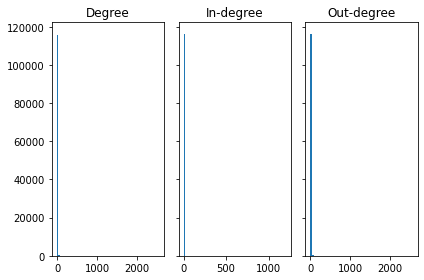

In [14]:
degrees = np.array([val for (node, val) in graph.degree])
in_degrees = np.array([val for (node, val) in graph.in_degree])
out_degrees = np.array([val for (node, val) in graph.out_degree])
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(degrees, bins=100)
axs[1].hist(in_degrees, bins=100)
axs[2].hist(out_degrees, bins=50)
axs[0].title.set_text('Degree')
axs[1].title.set_text('In-degree')
axs[2].title.set_text('Out-degree')
plt.show()

## Strongly Connected Components Analysis

In [6]:
print(f'Number of strongly connected components: {nx.number_strongly_connected_components(graph)}', end='\n\n')
max_connected_component = max(nx.strongly_connected_components(graph), key=len)
connected_components = [Gc for Gc in sorted(nx.strongly_connected_components(graph), key=len, reverse=True)]
connected_components_length = np.array([len(x) for x in connected_components])
print("Distribution of size of connected_components")
unique, frequency = np.unique(connected_components_length, return_counts=True)
print("Different sizes of connected groups:", unique)
print("Frequency corresponsing to each group:", frequency)

Number of strongly connected components: 116079

Distribution of size of connected_components
Different sizes of connected groups: [  1   2   3   4   5   6   8   9 503]
Frequency corresponsing to each group: [116009     44     10      6      3      3      1      2      1]


## Temporal Analysis

Mean value of all timestamps: 1649859324.9904575
Average intertransaction time over all transactions: 0.7896738908615974
Number of nodes with more than 1 edge: 28938
Average value of average intertransaction time of each node: 6405.973159379302


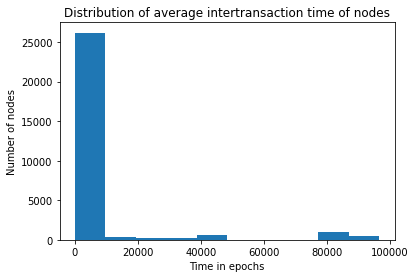

In [10]:
def degree_func(item):
    node, val = item
    return val>1

timestamps = np.array([int(ts) for i, j, ts in graph.edges.data('timestamp')])

timestamps = np.sort(timestamps)
print(f'Mean value of all timestamps: {np.mean(timestamps)}')

timestamps_diff = np.diff(timestamps)
print(f'Average intertransaction time over all transactions: {np.mean(timestamps_diff)}')

degrees = np.array([node for (node, val) in filter(degree_func, graph.degree)])

total_avg_intertransaction_time = np.array([])
for node in degrees:
    edges = [*graph.in_edges(node, data='timestamp'), *graph.out_edges(node, data='timestamp')]
    timestamps = np.array([int(timestamp) for sender, receiver, timestamp in edges])
    timestamps = np.sort(timestamps)
    timestamps = np.diff(timestamps)
    total_avg_intertransaction_time = np.append(total_avg_intertransaction_time, np.mean(timestamps))

print("Number of nodes with more than 1 edge:", len(total_avg_intertransaction_time))
print("Average value of average intertransaction time of each node:", np.mean(total_avg_intertransaction_time))
plt.hist(total_avg_intertransaction_time, bins=10)
plt.title('Distribution of average intertransaction time of nodes')
plt.xlabel('Time in epochs')
plt.ylabel('Number of nodes')
plt.show()


